In [ ]:
!pip install --upgrade google-cloud-BigQuery
!pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]'
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/infinite-rope-346217-4502821e3fc7.json"

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 31 kB/s 
     |████████████████████████████████| 198 kB 39.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=9aaf0f36f7f04326ace4ac63b883f3436b71771b7d9deba27dc1686c29a1c61d
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
from google.cloud import bigquery
import pandas as pd

client = bigquery.Client()

In [ ]:
# Construct a reference to the "crypto_bitcoin" dataset
dataset_ref = client.dataset("crypto_bitcoin", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "transactions" table
table_ref = dataset_ref.table("transactions")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "transactions" table
inputs = client.list_rows(table, start_index = 700000000, max_results=100).to_dataframe()

In [ ]:
!apt-get update -qq > /dev/null
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz
!tar xf spark-2.4.8-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.8-bin-hadoop2.7"

import findspark
findspark.init()

from pyspark import SparkContext
sc = SparkContext(appName="YourTest", master="local[*]")

In [ ]:
inputs.head()

In [ ]:
inputs.to_csv("out.csv")

In [ ]:
data = spark.read.csv("out.csv", header=True)

In [ ]:
data.show(1)

+---+--------------------+----+------------+-------+---------+--------------------+------------+--------------------+---------------------+-----------+------------+-----------------+-----------------+-----------+--------------+--------------------+--------------------+
|_c0|                hash|size|virtual_size|version|lock_time|          block_hash|block_number|     block_timestamp|block_timestamp_month|input_count|output_count|      input_value|     output_value|is_coinbase|           fee|              inputs|             outputs|
+---+--------------------+----+------------+-------+---------+--------------------+------------+--------------------+---------------------+-----------+------------+-----------------+-----------------+-----------+--------------+--------------------+--------------------+
|  0|221bd2048ade65764...| 249|         168|      2|   717185|00000000000000000...|      717186|2022-01-04 17:46:...|           2022-01-01|          1|           2|2652174.000000000|2650494.

In [ ]:
# rename
data.createOrReplaceTempView("transaction")
data.dtypes

[('_c0', 'string'),
 ('hash', 'string'),
 ('size', 'string'),
 ('virtual_size', 'string'),
 ('version', 'string'),
 ('lock_time', 'string'),
 ('block_hash', 'string'),
 ('block_number', 'string'),
 ('block_timestamp', 'string'),
 ('block_timestamp_month', 'string'),
 ('input_count', 'string'),
 ('output_count', 'string'),
 ('input_value', 'string'),
 ('output_value', 'string'),
 ('is_coinbase', 'string'),
 ('fee', 'string'),
 ('inputs', 'string'),
 ('outputs', 'string')]

In [ ]:
updated = data.withColumn("inputs", data['inputs'][1:2])
updated.show(1)

+---+--------------------+----+------------+-------+---------+--------------------+------------+--------------------+---------------------+-----------+------------+-----------------+-----------------+-----------+--------------+------+--------------------+
|_c0|                hash|size|virtual_size|version|lock_time|          block_hash|block_number|     block_timestamp|block_timestamp_month|input_count|output_count|      input_value|     output_value|is_coinbase|           fee|inputs|             outputs|
+---+--------------------+----+------------+-------+---------+--------------------+------------+--------------------+---------------------+-----------+------------+-----------------+-----------------+-----------+--------------+------+--------------------+
|  0|221bd2048ade65764...| 249|         168|      2|   717185|00000000000000000...|      717186|2022-01-04 17:46:...|           2022-01-01|          1|           2|2652174.000000000|2650494.000000000|      False|1680.000000000|    [

PRICE

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


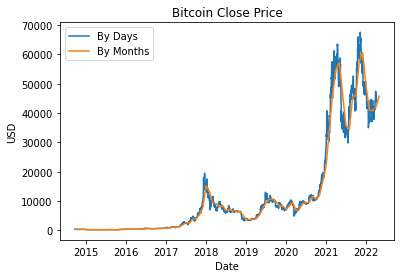

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
df = pd.read_csv("BTC-USD.csv")
df.Timestamp = pd.to_datetime(df.Date)
df.index = df.Timestamp
df_month_BTC = df.resample('M').mean()
df_day_BTC = df.resample('D').mean()

plt.plot(df_day_BTC.Close, label = "By Days")
plt.plot(df_month_BTC.Close, label = "By Months")
plt.title("Bitcoin Close Price")
plt.xlabel("Date")
plt.ylabel("USD")
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


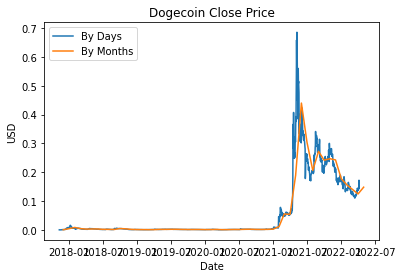

In [ ]:
df = pd.read_csv("DOGE-USD.csv")
df.Timestamp = pd.to_datetime(df.Date)
df.index = df.Timestamp
df_month_DOGE = df.resample('M').mean()
df_day_DOGE = df.resample('D').mean()

plt.plot(df_day_DOGE.Close, label = "By Days")
plt.plot(df_month_DOGE.Close, label = "By Months")
plt.title("Dogecoin Close Price")
plt.xlabel("Date")
plt.ylabel("USD")
plt.legend()

In [ ]:
df = pd.read_csv("ETH Price Data.csv")
df.Timestamp = pd.to_datetime(df.timestamp)
df.index = df.Timestamp
df_month_ETH = df.resample('M').mean()
df_day_ETH = df.resample('D').mean()



PREDICT (Bitcoin)

In [ ]:
df_month = df_month_DOGE

Stationarity check and STL-decomposition of the series

Dickey–Fuller test: p=0.445101


<Figure size 1080x504 with 0 Axes>

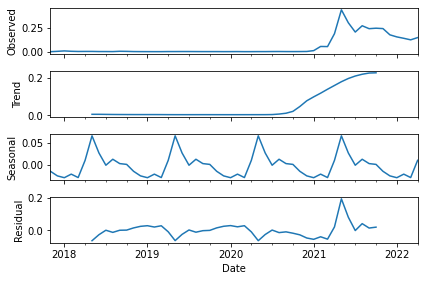

In [ ]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.Close).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Close)[1])
plt.show()

Box-Cox Transformations

In [ ]:
# Box-Cox Transformations
df_month['Close_Price_box'], lmbda = stats.boxcox(df_month.Close)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Close)[1])

Dickey–Fuller test: p=0.445101


Seasonal differentiation

In [ ]:
# Seasonal differentiation
df_month['prices_box_diff'] = df_month.Close_Price_box - df_month.Close_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.501767


Regular differentiation

Dickey–Fuller test: p=0.218873


<Figure size 1080x504 with 0 Axes>

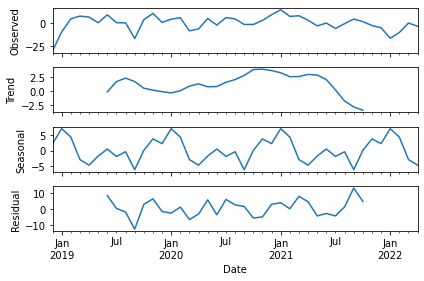

In [ ]:
# Regular differentiation
df_month['prices_box_diff2'] = df_month.prices_box_diff - df_month.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_month.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff2[13:])[1])

plt.show()

Model Selection

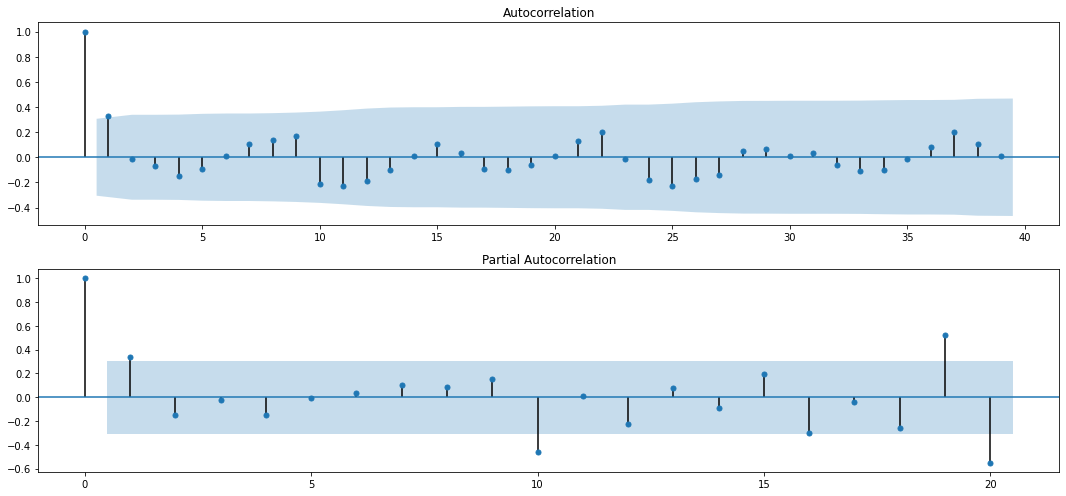

In [ ]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.prices_box_diff2[13:].values.squeeze(), lags=39, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.prices_box_diff2[13:].values.squeeze(), lags=20, ax=ax)
plt.tight_layout()
plt.show()

Initial approximation of parameters

In [ ]:
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Close_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [ ]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
7   (0, 1, 0, 1)  281.440436
37  (2, 0, 0, 1)  283.296154
10  (0, 1, 2, 0)  283.313741
8   (0, 1, 1, 0)  283.322898
13  (0, 2, 0, 1)  283.345712
                                 Statespace Model Results                                 
Dep. Variable:                    Close_Price_box   No. Observations:                   54
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -137.720
Date:                            Thu, 07 Apr 2022   AIC                            281.440
Time:                                    04:29:51   BIC                            286.581
Sample:                                11-30-2017   HQIC                           283.312
                                     - 04-30-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

Analysis of residues

Dickey–Fuller test:: p=0.001128


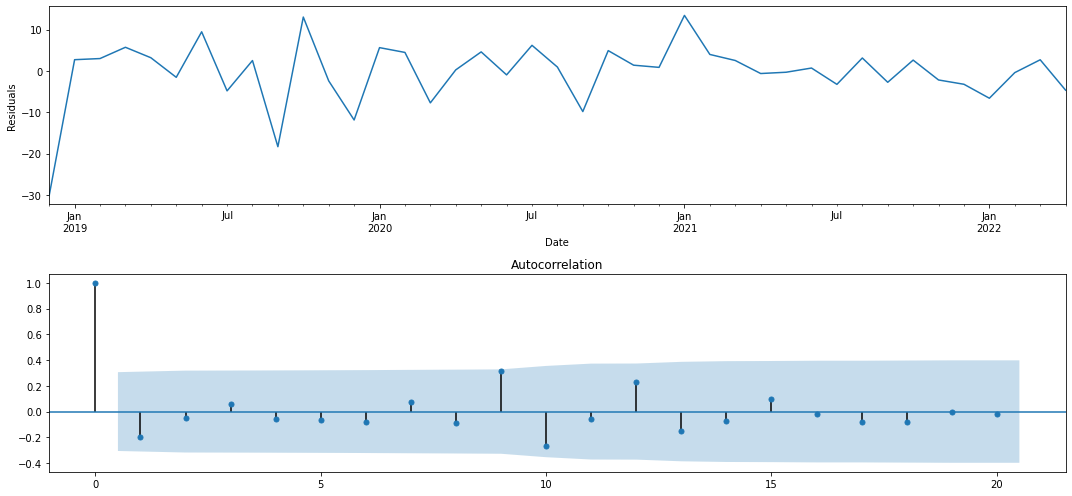

In [ ]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=24, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

Prediction

In [ ]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

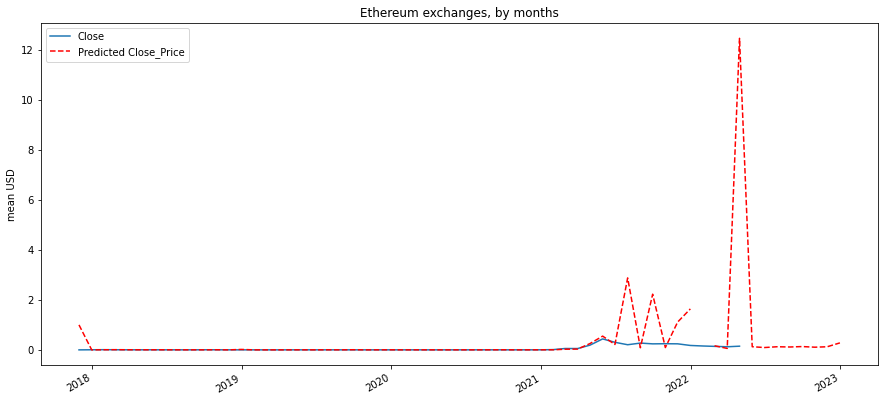

In [ ]:
# Prediction
df_month2 = df_month[['Close']]
date_list = [datetime(2022, 4, 30), datetime(2022, 5, 31), datetime(2022, 6, 30), datetime(2022, 7, 31), datetime(2022, 8, 31), datetime(2022, 9, 30), 
             datetime(2022, 10, 31), datetime(2022, 11, 30), datetime(2022, 12, 31), datetime(2023, 1, 31),
             datetime(2023, 2, 28), datetime(2023, 3, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=275), lmbda)
plt.figure(figsize=(15,7))
df_month2.Close.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Close_Price')
plt.legend()
plt.title('Ethereum exchanges, by months')
plt.ylabel('mean USD')
plt.show()

US Interest Rate

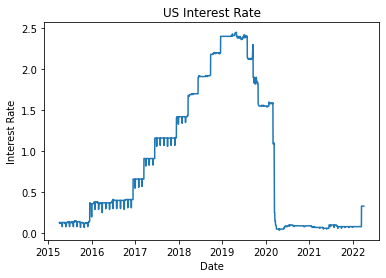

In [ ]:
df = pd.read_csv("us.csv")
# df.Timestamp = pd.to_datetime(df.date)
# df.index = df.Timestamp
idx = pd.to_datetime(df.date) >= pd.to_datetime('2015/04/06')
x = pd.to_datetime(df.date)[idx]
y = df[' rate'][idx]
plt.plot(x, y)
plt.xlabel("Date")
plt.ylabel("Interest Rate")
plt.title("US Interest Rate")
plt.savefig('US_Interest_Rate.png', dpi = 250, bbox_inches="tight")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


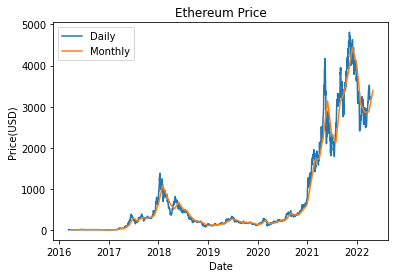

In [ ]:
df = pd.read_csv("ETH PRICE.csv")
df.Price = df.Price.str.replace(',','').astype(float)
x = pd.to_datetime(df.Date)
y = df.Price

df.index = x
y_month = df.resample('M').mean()
plt.plot(x,y, label = "Daily")
plt.plot(y_month,label = "Monthly")
plt.title('Ethereum Price')
plt.xlabel("Date")
plt.ylabel("Price(USD)")
plt.legend()
plt.savefig('Ethereum_Price.png', dpi = 250, bbox_inches="tight")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


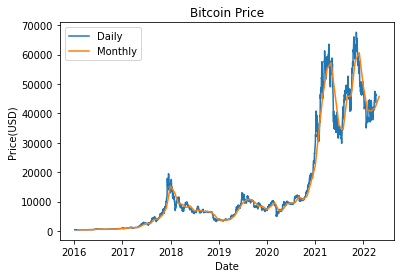

In [ ]:
df = pd.read_csv("BTC-USD.csv")
idx = pd.to_datetime(df.Date) >= pd.to_datetime('2016/01/06')
df = df[idx]
df.Timestamp = pd.to_datetime(df.Date)
df.index = df.Timestamp
df_month_BTC = df.resample('M').mean()
df_day_BTC = df.resample('D').mean()

plt.plot(df_day_BTC.Close, label = "Daily")
plt.plot(df_month_BTC.Close, label = "Monthly")
plt.title("Bitcoin Price")
plt.xlabel("Date")
plt.ylabel("Price(USD)")
plt.legend()
plt.savefig('Bitcoin_Price.png', dpi = 250, bbox_inches="tight")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


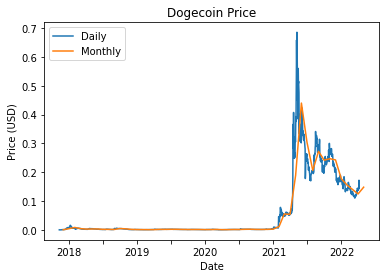

In [ ]:
df = pd.read_csv("DOGE-USD.csv")
df.Timestamp = pd.to_datetime(df.Date)
df.index = df.Timestamp
df_month_DOGE = df.resample('M').mean()
df_day_DOGE = df.resample('D').mean()

plt.plot(df_day_DOGE.Close, label = "Daily")
plt.plot(df_month_DOGE.Close, label = "Monthly")
plt.title("Dogecoin Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
xloc = [pd.to_datetime('2018-01-01'),
        pd.to_datetime('2018-07-01'),
        pd.to_datetime('2019-01-01'), 
        pd.to_datetime('2019-07-01'),
        pd.to_datetime('2020-01-01'), 
        pd.to_datetime('2020-07-01'),
        pd.to_datetime('2021-01-01'),
        pd.to_datetime('2021-07-01'),
        pd.to_datetime('2022-01-01')]
xlab = ['2018', '', '2019', '', '2020', '', '2021', '', '2022']
plt.xticks(xloc, xlab)
plt.legend(loc='upper left')
plt.savefig('Doge_Price.png', dpi = 250, bbox_inches="tight")